### Homework 5 
### Anthony Martinez | amm180005

### Step 1: Description

This notebook performs regression to estimate the price of a car given various features. 

### Step 2: Load the data 

* upload the data
* put the data in a pandas dataframe
* output the data shape (rows, cols)
* output the first few rows of the data

In [ ]:
# load the csv file up into the cloud
import numpy as np
import pandas as pd
import io
import seaborn as sb

from google.colab import files
uploaded = files.upload()

Saving audi.csv to audi.csv


In [ ]:
# put the data in a pandas datafram
df = pd.read_csv(io.BytesIO(uploaded['audi.csv']))

# output the data shape
df.shape

# output the first few rows of the data
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


### Step 3 Data Exploration



In [ ]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [ ]:
# change categorical column type from object to category
df = df.astype({"model":'category', "transmission":"category", "fuelType":"category"})
df.dtypes

model           category
year               int64
price              int64
transmission    category
mileage            int64
fuelType        category
tax                int64
mpg              float64
engineSize       float64
dtype: object

In [ ]:
# check for NAs
df.isna().sum() # check if na over entier DF in one line of code


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
# use describe() to examine the data
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


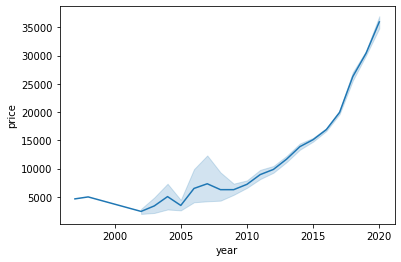

In [ ]:
# using seaborn, craete a lineplot() with year on the x axis and price on the y axis
sb.lineplot(x=df['year'], y=df['price'])

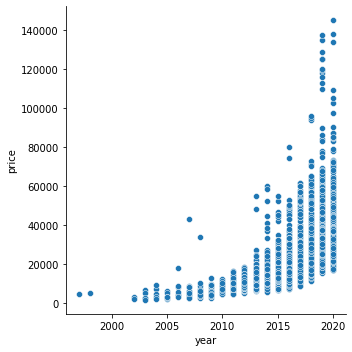

In [ ]:
# create another plot exploring the data
# choose columns and plot type

sb.relplot(x='year', y='price', data=df)

### Step 4 Prepare Data

You can use the code below for this step. 



In [ ]:
# set up X and y

X=df.drop(columns=['price'],axis=1)
y=df['price']

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

# scale the numeric data
col_list = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = MinMaxScaler()
train_numeric = scaler.fit_transform(X_train[col_list])
test_numeric = scaler.transform(X_test[col_list])

# one-hot encode the categorical data for model, transmission, and fuelType
# model
zipBinarizer = LabelBinarizer().fit(df['model'])
train_model = zipBinarizer.transform(X_train['model'])
test_model = zipBinarizer.transform(X_test['model'])
# transmission
zipBinarizer = LabelBinarizer().fit(df['transmission'])
train_transmission = zipBinarizer.transform(X_train['transmission'])
test_transmission = zipBinarizer.transform(X_test['transmission'])
# fuelType
zipBinarizer = LabelBinarizer().fit(df['fuelType'])
train_fuelType = zipBinarizer.transform(X_train['fuelType'])
test_fuelType = zipBinarizer.transform(X_test['fuelType'])

# concatenate
X_train_input = np.hstack([train_numeric, train_model, train_transmission, train_fuelType])
X_test_input = np.hstack([test_numeric, test_model, test_transmission, test_fuelType])

print(X_train_input[:3])


[[0.82608696 0.08549562 0.34482759 0.16646989 0.31746032 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         1.         0.
  0.        ]
 [0.82608696 0.16956399 0.25       0.22195986 0.31746032 0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         1.         0.
  0.        ]
 [0.86956522 0.06832219 0.34482759 0.12691854 0.31746032 1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        

### Step 5 Linear regression

Run linear regression in sklearn. 

In [ ]:
# train the algorithm
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_input, y_train)

LinearRegression()

In [ ]:
# make predictions
y_pred = linreg.predict(X_test_input)


In [ ]:
# evaluation on the test data using mse, mae, and r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('r2: ', r2_score(y_test, y_pred))

MSE:  14011962.625299402
MAE:  2547.2941618731647
r2:  0.8872992801931721


In [ ]:
# display the first 5 predictions
print(y_pred[:5])

[30522.97956788 12908.02941015 10678.90954458 27933.18126284
 19806.44953011]


In [ ]:
# display the first 5 actual values
print(y_test[:5])

6051    31490
9284    12895
3562    11498
2780    25636
7542    31888
Name: price, dtype: int64


### Regression in Keras

In [ ]:
# build a sequential model
# choose the architecture

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
                          layers.Dense(500, activation='relu'),
                          layers.Dense(250, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(1)                        
])



In [ ]:
# compile the model
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mse","mae"])


In [ ]:
# train the model
model.fit(X_train_input, y_train, epochs=100, batch_size=128)


Epoch 1/100
67/67 [==============================] - 1s 7ms/step - loss: 619959040.0000 - mse: 619959040.0000 - mae: 21855.7930
Epoch 2/100
67/67 [==============================] - 0s 7ms/step - loss: 281802496.0000 - mse: 281802496.0000 - mae: 12245.7539
Epoch 3/100
67/67 [==============================] - 0s 7ms/step - loss: 111740408.0000 - mse: 111740408.0000 - mae: 7269.6201
Epoch 4/100
67/67 [==============================] - 0s 7ms/step - loss: 88065344.0000 - mse: 88065344.0000 - mae: 6260.7168
Epoch 5/100
67/67 [==============================] - 0s 7ms/step - loss: 73720224.0000 - mse: 73720224.0000 - mae: 5563.8672
Epoch 6/100
67/67 [==============================] - 0s 7ms/step - loss: 63755056.0000 - mse: 63755056.0000 - mae: 5116.3281
Epoch 7/100
67/67 [==============================] - 0s 7ms/step - loss: 54536584.0000 - mse: 54536584.0000 - mae: 4674.6709
Epoch 8/100
67/67 [==============================] - 0s 7ms/step - loss: 46823548.0000 - mse: 46823548.0000 - mae: 42

In [ ]:
# output test mse score, test mae score

loss, test_mse, test_mae = model.evaluate(X_test_input, y_test)
print('MSE:', test_mse)
print('MAE:', test_mae)




67/67 [==============================] - 0s 2ms/step - loss: 6042085.5000 - mse: 6042085.5000 - mae: 1705.4005
MSE: 6042085.5
MAE: 1705.4005126953125


### Step 7 Commentary

Answer the following questions:

a. Compare metrics from sklearn and Keras. 


b. Explore the data a bit more to speculate on why you achieved the results you got. 


c. Describe all the architectures/hyperparameters you tried and the results. What do you conclude?



a. 

Sklearn:

- MSE:  14011962.625299402
- MAE:  2547.2941618731647
- r2:  0.8872992801931721

Keras:

- MSE: 6042085.5
- MAE: 1705.4005126953125

Keras did significantly better than sklearn 


b. I think my results were not that great. I think we are using too many
predictors which cause too much noise for the algorithms to work with efficiently. Removing unneeded predictors could possibly improve the results. Also, the various predictors have a wide range so scaling or normalizing the data could also prove effective.
   
c. One of the first models I tried was 1 layer with 5 nodes with relu as
the activation function. I used rmsprop as the optimizer, and mean_squared_error as the loss function. I got a mse score of 675202112.0000 and a mae score of 23048.5840. Which, of course, is extremely poor.

Next, I changed the model architecture to 3 layers with 64 nodes in layers 1 and 2 and 1 node in the last layer. The results were much better 
at mseL 9855431.0000 and mae: 2057.0847

The best results I got was with 4 layers of 500, 250, 64, 1 and 100 epochs. 
MSE: 6042085.5
MAE: 1705.4005126953125 
